In [10]:
    import pyscreenshot as ImageGrab
    import time
    images_folder="captured_images/9/"  
    for i in range(0,50):
        time.sleep(8)
        im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
        print("saved......",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen now and redraw now........")

saved...... 0
clear screen now and redraw now........
saved...... 1
clear screen now and redraw now........
saved...... 2
clear screen now and redraw now........
saved...... 3
clear screen now and redraw now........
saved...... 4
clear screen now and redraw now........
saved...... 5
clear screen now and redraw now........
saved...... 6
clear screen now and redraw now........
saved...... 7
clear screen now and redraw now........
saved...... 8
clear screen now and redraw now........
saved...... 9
clear screen now and redraw now........
saved...... 10
clear screen now and redraw now........
saved...... 11
clear screen now and redraw now........
saved...... 12
clear screen now and redraw now........
saved...... 13
clear screen now and redraw now........
saved...... 14
clear screen now and redraw now........
saved...... 15
clear screen now and redraw now........
saved...... 16
clear screen now and redraw now........
saved...... 17
clear screen now and redraw now........
saved...... 18
clear

HEllo


In [13]:
#Generate dataset
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [15]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
473      9       1       1       1       1       1       1       1       1   
8        0       1       1       1       1       1       1       1       1   
483      9       1       1       1       1       1       1       1       1   
88       1       1       1       1       1       1       1       1       1   
253      5       1       1       1       1       1       1       1       1   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
189      3       1       1       1       1       1       1       1       1   
58       1       1       1       1       1       1       1       1       1   
158      3       1       1       1       1       1       1       1       1   
449      8       1       1       1       1       1       1       1       1   
431      8       1       1       1       1       1       1       1       1   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [16]:
X = data.drop(["label"],axis=1)
Y= data["label"]

1


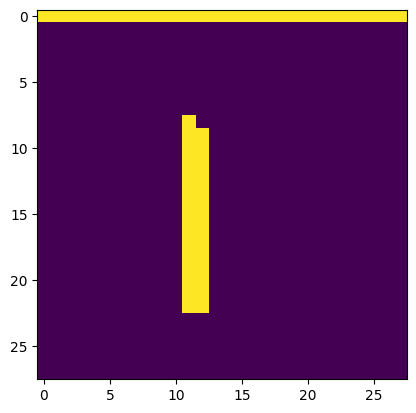

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 90
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [19]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [20]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.9


In [23]:
#prediction of image drawn in paint
  
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer")
images_folder="img/"
  
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
    
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X=[]
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (40,40), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(100)
    
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8
Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox
  
window=tk.Tk()
window.title("Handwritten digit recognition")
  
l1=tk.Label(window,text="Digit",font=('Algerian',20))
l1.place(x=5,y=0)
  
t1=tk.Entry(window,width=20, border=5)
t1.place(x=150, y=0)
  
def screen_capture():
   import pyscreenshot as ImageGrab
   import time
   import os
   os.startfile("C:/ProgramData/Microsoft/Windows/Start Menu/Programs/Accessories/Paint")
   s1=t1.get()
   os.chdir("E:/DS and ML/Untitled Folder/Untitled Folder/captured_images")
   os.mkdir(s1)
   os.chdir("E:/DS and ML/Untitled Folder/Untitled Folder/")
  
   images_folder="captured_images/"+s1+"/"
   time.sleep(15)
   for i in range(0,5):
       time.sleep(8)
       im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
       print("saved......",i)
       im.save(images_folder+str(i)+'.png')
       print("clear screen now and redraw now........")
   messagebox.showinfo("Result","Capturing screen is completed!!")
    
b1=tk.Button(window,text="1. Open paint and capture the screen", font=('Algerian',15),bg="orange",fg="black",command=screen_capture)
b1.place(x=5, y=50)
  
def generate_dataset():
   import cv2
   import csv
   import glob
  
   header  =["label"]
   for i in range(0,784):
       header.append("pixel"+str(i))
   with open('dataset.csv', 'a') as f:
       writer = csv.writer(f)
       writer.writerow(header)
  
   for label in range(10):
       dirList = glob.glob("captured_images/"+str(label)+"/*.png")
  
       for img_path in dirList:
           im= cv2.imread(img_path)
           im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
           im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
           roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
  
           data=[]
           data.append(label)
           rows, cols = roi.shape
  
           ##  Fill the data array with pixels one by one.
           for i in range(rows):
               for j in range(cols):
                   k =roi[i,j]
                   if k>100:
                       k=1
                   else:
                       k=0
                   data.append(k)
           with open('dataset.csv', 'a') as f:
               writer = csv.writer(f)
               writer.writerow(data)
   messagebox.showinfo("Result","Generating dataset is completed!!")
    
b2=tk.Button(window,text="2. Generate dataset", font=('Algerian',15),bg="pink",fg="blue",command=generate_dataset)
b2.place(x=5, y=100)
  
def train_save_accuracy():
   import pandas as pd
   from sklearn.utils import shuffle
   data  =pd.read_csv('dataset.csv')
   data=shuffle(data)
   X = data.drop(["label"],axis=1)
   Y= data["label"]
   from sklearn.model_selection import train_test_split
   train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)
   import joblib
   from sklearn.svm import SVC
   classifier=SVC(kernel="linear", random_state=6)
   classifier.fit(train_x,train_y)
   joblib.dump(classifier, "model/digit_recognizer")
   from sklearn import metrics
   prediction=classifier.predict(test_x)
   acc=metrics.accuracy_score(prediction, test_y)
   messagebox.showinfo("Result",f"Your accuracy is {acc}")
    
b3=tk.Button(window,text="3. Train the model, save it and calculate accuracy", font=('Algerian',15),bg="green",fg="white",command=train_save_accuracy)
b3.place(x=5, y=150)
  
def prediction():
   import joblib
   import cv2
   import numpy as np #pip install numpy
   import time
   import pyscreenshot as ImageGrab
   import os
   os.startfile("C:/ProgramData/Microsoft/Windows/Start Menu/Programs/Accessories/Paint")
    
   model=joblib.load("model/digit_recognizer")
   images_folder="img/"
   time.sleep(15)
   while True:
       img=ImageGrab.grab(bbox=(60,170,400,500))
  
       img.save(images_folder+"img.png")
       im = cv2.imread(images_folder+"img.png")
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
  
       #Threshold the image
       ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
       roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
  
       rows,cols=roi.shape
  
       X = []
  
       ##  Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k = roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               X.append(k)
  
       predictions  =model.predict([X])
       print("Prediction:",predictions[0])
       cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
  
       cv2.startWindowThread()
       cv2.namedWindow("Result")
       cv2.imshow("Result",im)
       cv2.waitKey(10000)
       if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
           break
   cv2.destroyAllWindows()
    
b4=tk.Button(window,text="4. Live prediction", font=('Algerian',15),bg="white",fg="red",command=prediction)
b4.place(x=5, y=200)
  
window.geometry("600x300")
window.mainloop()


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 8


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 1


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 1


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 0


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 2


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 2


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Prediction: 2
